In [1]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
dataFile = '../breast_cancer_m.csv'
data=pd.read_csv(dataFile)
data.head(5)

,A,B,C,D,E,F,G,H,I,J,...,V,W,X,Y,Z,AA,AB,AC,AD,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
x=data.iloc[:,:-1]
y=data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [4]:
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9298245614035088

In [5]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5,min_samples_split=25, random_state=11)
clf.fit(x_train,y_train)
score_test=clf.score(x_test,y_test)
score_train=clf.score(x_train,y_train)
score_train,score_test

(0.9623115577889447, 0.9298245614035088)

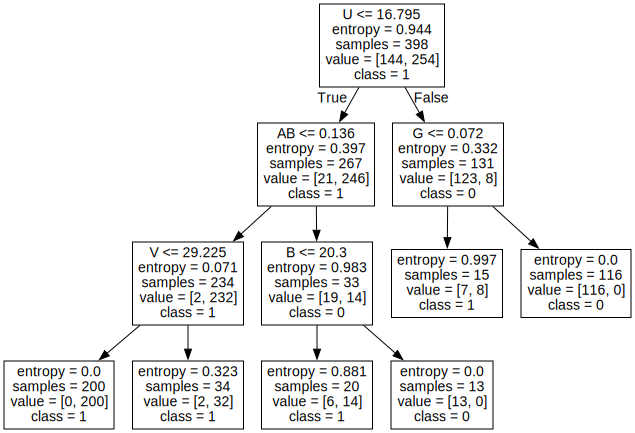

In [14]:
feature_list=x.columns
dot_data=export_graphviz(clf,out_file=None,feature_names=feature_list,class_names=['0','1'])
graphviz.Source(dot_data)

[0.9271356783919598] [0.9122807017543859]
[0.9271356783919598, 0.9422110552763819] [0.9122807017543859, 0.9239766081871345]
[0.9271356783919598, 0.9422110552763819, 0.9623115577889447] [0.9122807017543859, 0.9239766081871345, 0.9298245614035088]
[0.9271356783919598, 0.9422110552763819, 0.9623115577889447, 0.9623115577889447] [0.9122807017543859, 0.9239766081871345, 0.9298245614035088, 0.9298245614035088]
[0.9271356783919598, 0.9422110552763819, 0.9623115577889447, 0.9623115577889447, 0.9623115577889447] [0.9122807017543859, 0.9239766081871345, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088]
[0.9271356783919598, 0.9422110552763819, 0.9623115577889447, 0.9623115577889447, 0.9623115577889447, 0.9623115577889447] [0.9122807017543859, 0.9239766081871345, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088]
[0.9271356783919598, 0.9422110552763819, 0.9623115577889447, 0.9623115577889447, 0.9623115577889447, 0.9623115577889447, 0.9623115577889447] [0.9122

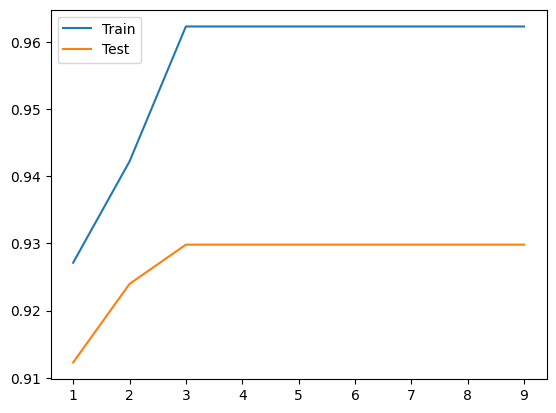

In [16]:
#学习曲线
import matplotlib.pyplot as plt
score_test_list,score_train_list=[],[]
for i in range(1,10):
    clf=DecisionTreeClassifier(random_state=11,criterion='entropy'
                               ,max_depth=i
                               ,min_samples_leaf=5,
                               min_samples_split=25)
    clf.fit(x_train,y_train)
    score_test=clf.score(x_test,y_test)
    score_train=clf.score(x_train,y_train)
    score_test_list.append(score_test)
    score_train_list.append(score_train)
    print(score_train_list,score_test_list)
plt.plot(range(1,10),score_train_list,label='Train')
plt.plot(range(1,10),score_test_list,label='Test')
plt.legend()
plt.show()